# Εργασία 3

## Α. Ομαδοποίηση χειρόγραφων ψηφίων της MNIST

### 1. Preprocessing

Τα δεδομένα περιέχονται στο αρχείο mnist_all.mat. Το διάβασμα του αρχείου γίνεται με την συνάρτηση scipy.io.loadmat η οποία επιστρέφει ένα dictionary το οποίο έχει κλειδια τα 'train0', 'train1', 'train2',... και 'test0', 'test1', 'test2',... και data τις εικόνες των αντίστοιχων ψηφίων.

In [1]:
import urllib.request
import numpy as np
import scipy.io
import os

np.random.seed(0)

url = 'https://cs.nyu.edu/~roweis/data/mnist_all.mat'
filename = 'mnist_all.mat'

if not os.path.exists(filename):
    print('Downloading file...')
    urllib.request.urlretrieve(url, filename)
    print('Done.')

mat = scipy.io.loadmat(filename)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train0', 'test0', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3', 'train4', 'test4', 'train5', 'test5', 'train6', 'test6', 'train7', 'test7', 'train8', 'test8', 'train9', 'test9'])

Οι εικόνες των ψηφίων έχουν μέγεθος 784 = 28x28.

In [2]:
digit = mat['train2'][0]
digit.shape

(784,)

Παρακάτω φαίνονται οι εικόνες πέντε ψηφίων.

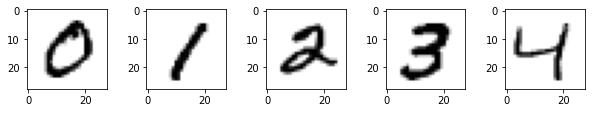

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 5
fig, axs = plt.subplots(1, n, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5)
for i in range(n):
    digit = mat['train' + str(i)][0]
    digit = digit.reshape((28, 28))
    axs[i].imshow(digit, cmap=plt.cm.binary)
plt.show()

Οι είκονες και οι ετικέτες φορτώνονται σε numpy arrays. Το μέγεθος του training set είναι 20000 και του test set 10000. Η κανονικοποίηση στο διάστημα [0, 1] γίνεται με διαίρεση με το 255 το οποίο είναι η μέγιστη τιμή της φωτεινότητας ενός pixel.

In [4]:
x_train, y_train, x_test, y_test = [], [], [], []

for key, data in mat.items():
    if 'train' in key:
        for x in data:
            x_train.append(x)
            num = int(key[-1])
            y_train.append(num)
    if 'test' in key:
        for x in data:
            x_test.append(x)
            num = int(key[-1])
            y_test.append(num)

x_train = np.array(x_train, dtype=np.double)
y_train = np.array(y_train, dtype=np.double)
x_test = np.array(x_test, dtype=np.double)
y_test = np.array(y_test, dtype=np.double)
x_test_original = x_test

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (60000, 784)
y_train.shape = (60000,)
x_test.shape = (10000, 784)
y_test.shape = (10000,)


In [5]:
x_train /= 255.
x_test /= 255.

print()
print('x_train is in [{}, {}]'.format(np.min(x_train), np.max(x_train)))
print('x_test is in [{}, {}]'.format(np.min(x_test), np.max(x_test)))


x_train is in [0.0, 1.0]
x_test is in [0.0, 1.0]


Η εργασία συνεχίζεται στο 1/3 του dataset λόγω μειωμένων δυνατοτήτων του υπολογιστή.

In [6]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train, random_state=0)

x_train = x_train[:10000] # FIXME
y_train = y_train[:10000] # FIXME

Παρακάτω βλέπουμε το ιστόγραμμα των ψηφίων στο training set.

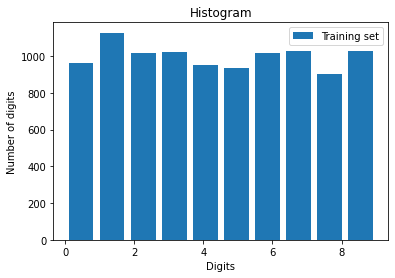

In [7]:
plt.hist(y_train, label='Training set', rwidth=0.8)
plt.title('Histogram')
plt.ylabel('Number of digits')
plt.xlabel('Digits')
plt.legend()
plt.show()

### 2. Embedding

Ακολουθεί εφαρμογή διάφορων embeddings: Spectral, Standard LLE, Modified LLE, Isomap και t-SNE με τα οποία μετασχηματίζονται τα δεδομένα σε χώρο μικρότερης διάστασης.

In [ ]:
from sklearn.manifold import SpectralEmbedding, LocallyLinearEmbedding, Isomap, TSNE

embeddings = [
    ('Spectral', SpectralEmbedding(n_components=2, n_neighbors=20, random_state=0, n_jobs=-1)),
    ('LLE', LocallyLinearEmbedding(n_components=2, n_neighbors=20, n_jobs=-1)),
    ('Isomap', Isomap(n_components=2, n_neighbors=20, n_jobs=-1)),
    ('t-SNE', TSNE(n_components=2, random_state=0, n_jobs=-1)),
]

plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

x_train_embedded_dict = {}

for i, (embedding_str, embedding) in enumerate(embeddings):
    x_train_embedded = embedding.fit_transform(x_train)
    x_train_embedded_dict[embedding_str] = x_train_embedded
    plt.subplot(2, 2, i+1)
    plt.title('{} Embedding'.format(embedding_str))
    plt.scatter(x_train_embedded[:, 0], x_train_embedded[:, 1],
                c=y_train, cmap='tab10', marker='+', alpha=0.5)
    plt.colorbar()
    
plt.show()

Επιλέγουμε να προχωρήσουμε με το t-SNE γιατί μας δίνει αρκετά καλά διαχωρισμένες κλάσεις.

In [ ]:
x_train_embedded = x_train_embedded_dict['t-SNE']

### 3. Algorithms

#### 3.1 MyKMeans

#### 3.2 MySpectralClustering

### 4. Clustering

In [ ]:
from sklearn.metrics import homogeneity_completeness_v_measure
from time import time

def do_the_clustering(clustering, X, y):
    all_n_clusters = range(2, 11)
    experiments_num = len(all_n_clusters)
    homogeneity = np.zeros(experiments_num)
    completeness = np.zeros(experiments_num)
    v_measure = np.zeros(experiments_num)
    times = np.zeros(experiments_num)

    plt.subplots(3, 3, figsize=(15, 12))
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    
    for i, n_clusters in enumerate(all_n_clusters):
        clustering.set_params(n_clusters=n_clusters)
        t1 = time()
        y_pred = clustering.fit_predict(X)
        t2 = time()
        times[i] = t2 - t1
        homogeneity[i], completeness[i], v_measure[i] = homogeneity_completeness_v_measure(y, y_pred)
        plt.subplot(3, 3, i+1)
        plt.title('n_clusters = {}'.format(n_clusters))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', marker='+', alpha=0.5)
        plt.colorbar()

    plt.show()
    
    plt.subplots(1, 2, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.4)
    
    plt.subplot(1, 2, 1)
    plt.title('Scores')
    plt.plot(all_n_clusters, homogeneity, label='Homogeneity')
    plt.plot(all_n_clusters, completeness, label='Completeness')
    plt.plot(all_n_clusters, v_measure, label='V-Measure')
    plt.legend()
    plt.ylabel('Score')
    plt.xlabel('n_clusters')
    
    plt.subplot(1, 2, 2)
    plt.title('Clustering time')
    plt.plot(all_n_clusters, times)
    plt.ylabel('Time (sec)')
    plt.xlabel('n_clusters')
    plt.show()

#### 4.1 My Unnormalized Spectral Clustering

#### 4.2 My Normalized Spectral Clustering - $L_{rw}$

#### 4.3 My Normalized Spectral Clustering - $L_{sym}$

#### 4.4 Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_neighbors=20, random_state=0, n_jobs=-1)

do_the_clustering(clustering, x_train_embedded, y_train)

### 5. Classification